<a href="https://colab.research.google.com/github/2003MADHAV/Aneimea-dection/blob/main/Aneimea_dection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import os
from PIL import Image
from tqdm.notebook import tqdm
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import seaborn as sns
from keras.preprocessing.image import load_img
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')

# Setup Kaggle API key
os.makedirs('/root/.kaggle', exist_ok=True)
!cp /content/drive/MyDrive/kaggle.json /root/.kaggle/  # Change path if kaggle.json is stored elsewhere in your Drive
!chmod 600 /root/.kaggle/kaggle.json

# Download and unzip the dataset into a specific directory in Google Drive
!kaggle datasets download -d nadiwidi/eyeanemia -p "/content/drive/MyDrive/EyeAnemiaDataset" --unzip

print("Dataset downloaded to /content/drive/MyDrive/EyeAnemiaDataset")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
cp: cannot stat '/content/drive/MyDrive/kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/nadiwidi/eyeanemia
License(s): unknown
  0% 0.00/2.00M [00:00<?, ?B/s]
100% 2.00M/2.00M [00:00<00:00, 46.0MB/s]
Dataset downloaded to /content/drive/MyDrive/EyeAnemiaDataset


In [ ]:
anemiapath = '/content/drive/MyDrive/EyeAnemiaDataset/Anemia (95)'
nonanemiapath = '/content/drive/MyDrive/EyeAnemiaDataset/Non Anemia (123)'

anemia_image_paths = [os.path.join(anemiapath, filename) for filename in tqdm(os.listdir(anemiapath))]
anemia_labels = [1] * len(anemia_image_paths)

non_anemia_image_paths = [os.path.join(nonanemiapath, filename) for filename in tqdm(os.listdir(nonanemiapath))]
non_anemia_labels = [0] * len(non_anemia_image_paths)

image_paths = anemia_image_paths + non_anemia_image_paths
labels = anemia_labels + non_anemia_labels

df = pd.DataFrame({"Image": image_paths, "Label": labels})

  0%|          | 0/95 [00:00<?, ?it/s]

  0%|          | 0/123 [00:00<?, ?it/s]

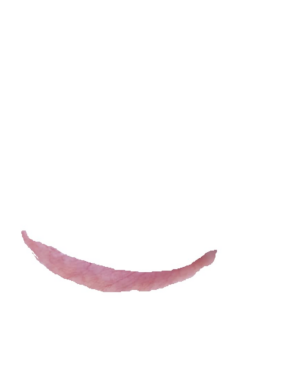

In [ ]:
img = Image.open(df['Image'][1])
plt.axis('off')
plt.imshow(img);

In [ ]:
x_train, x_test = train_test_split(df, test_size=0.2, random_state=42)

In [ ]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(df['Image'], df['Label'], test_size=0.2, random_state=42)

In [ ]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image)
        img = img.resize((224,224), Image.LANCZOS)
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),224,224,3)
    return features

In [ ]:
# Prepare data for the CNN model
x_train_features = extract_features(x_train)
x_train_features = x_train_features / 255.0  # Normalize pixel values

y_train = np.array(y_train)  # Convert labels to numpy array

# Optionally, do the same for the test set
x_test_features = extract_features(x_test)
x_test_features = x_test_features / 255.0
y_test = np.array(y_test)

  0%|          | 0/174 [00:00<?, ?it/s]

  0%|          | 0/44 [00:00<?, ?it/s]

In [ ]:
"""x= extract_features(x_train['Image'])
#normalization on the pixel values of the images
x = x/255.0
y = np.array(y_train['Label'])"""

"x= extract_features(x_train['Image'])\n#normalization on the pixel values of the images\nx = x/255.0\ny = np.array(y_train['Label'])"

In [ ]:
from tensorflow.keras import Input, layers, models

model = models.Sequential()
model.add(Input(shape=(224, 224, 3)))  # Define the input shape explicitly
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(filters=256, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


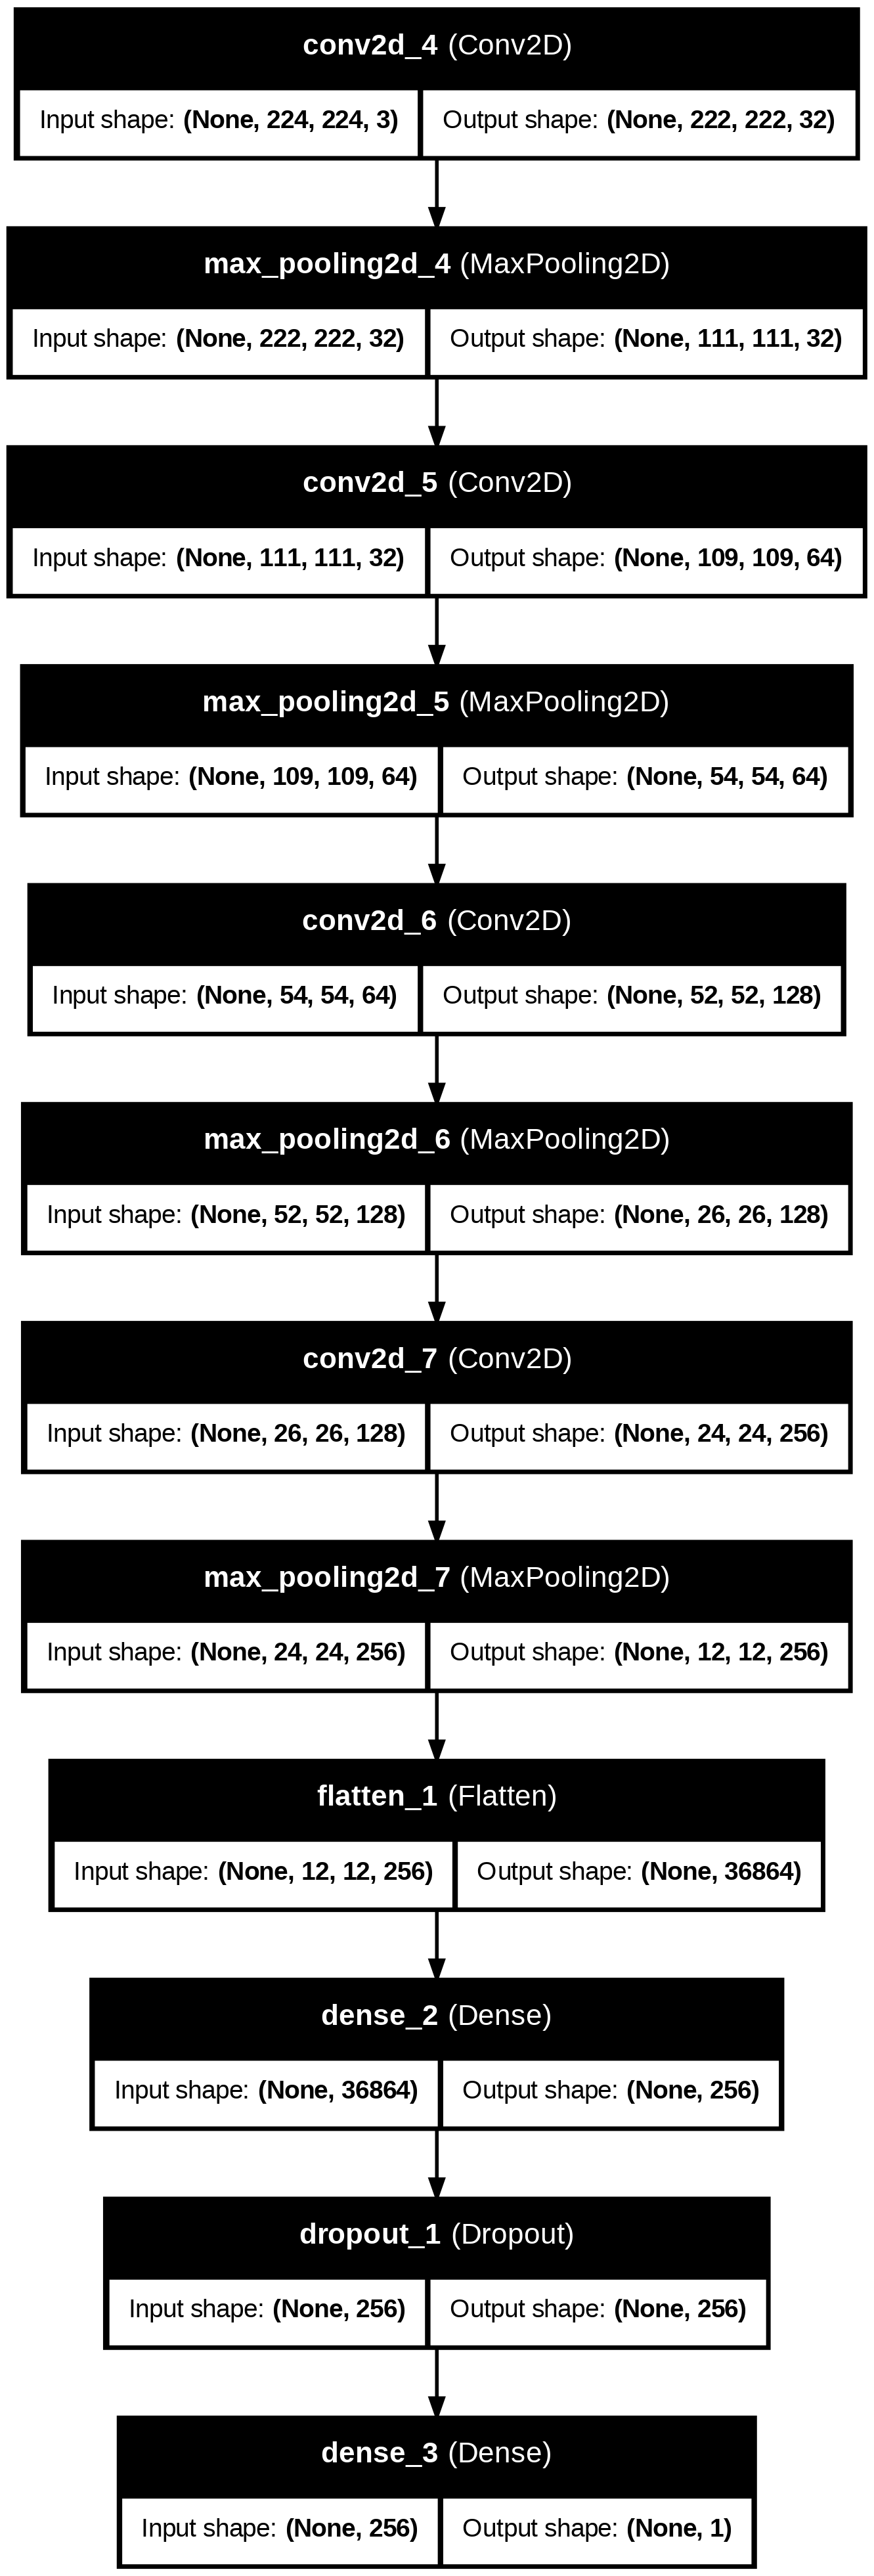

In [ ]:
from tensorflow.keras.utils import plot_model

# Plot the model and save it to a file
plot_model(model, to_file="model_architecture.png", show_shapes=True, show_layer_names=True)


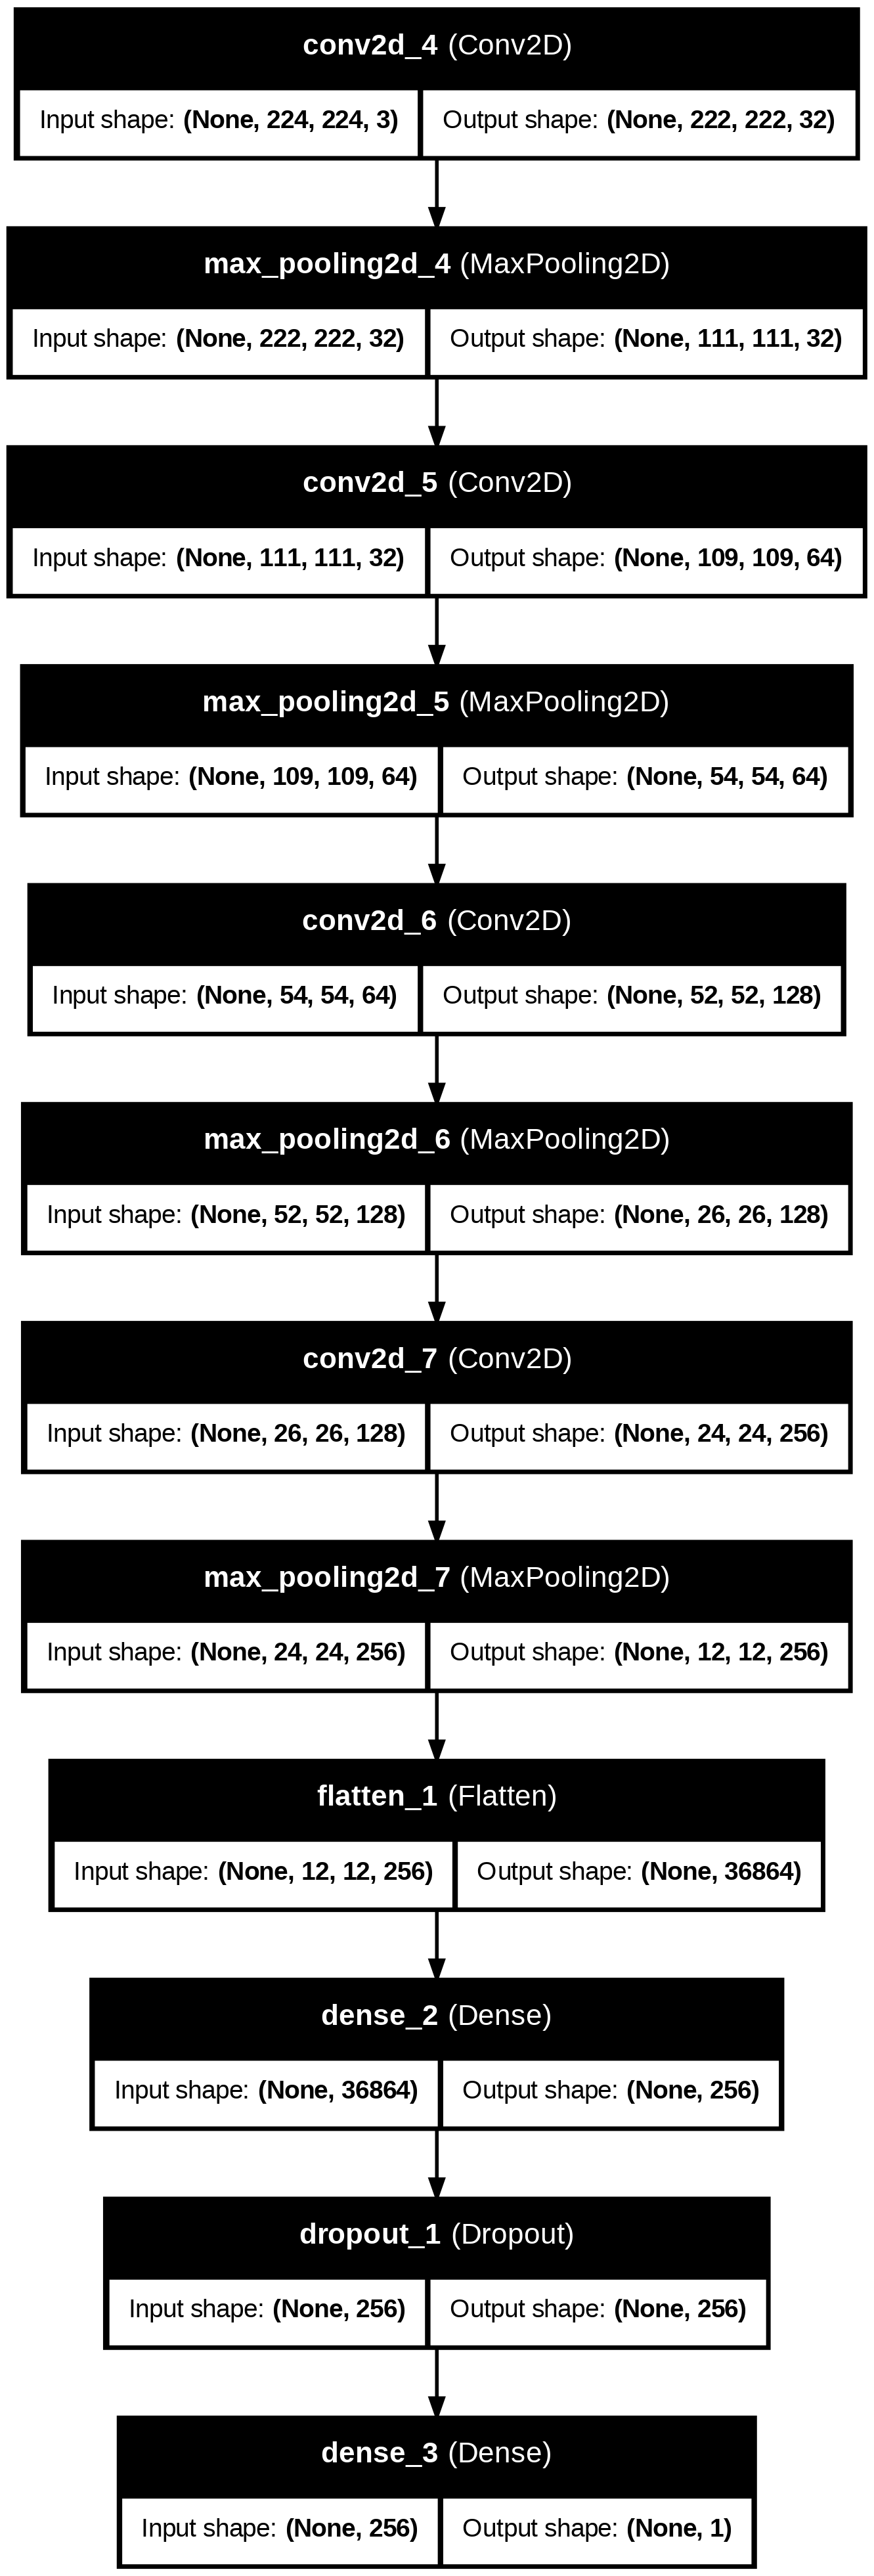

In [ ]:
from IPython.display import Image
Image(filename="model_architecture.png")


In [ ]:
# Training the model
history = model.fit(x=x_train_features, y=y_train, batch_size=32, epochs=40, validation_split=0.2)


Epoch 1/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 23s 4s/step - accuracy: 0.4575 - loss: 0.9021 - val_accuracy: 0.4000 - val_loss: 0.6956
Epoch 2/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 40s 4s/step - accuracy: 0.4779 - loss: 0.7052 - val_accuracy: 0.6571 - val_loss: 0.6924
Epoch 3/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 20s 4s/step - accuracy: 0.4922 - loss: 0.6936 - val_accuracy: 0.5714 - val_loss: 0.6880
Epoch 4/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 24s 4s/step - accuracy: 0.5706 - loss: 0.6902 - val_accuracy: 0.5714 - val_loss: 0.6674
Epoch 5/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 42s 4s/step - accuracy: 0.5208 - loss: 0.6714 - val_accuracy: 0.6000 - val_loss: 0.6128
Epoch 6/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 22s 4s/step - accuracy: 0.6436 - loss: 0.6230 - val_accuracy: 0.7714 - val_loss: 0.5289
Epoch 7/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 22s 5s/step - accuracy: 0.6297 - loss: 0.5698 - val_accuracy: 0.8857 - val_loss: 0.4890
Epoch 8/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 22s 4s/step - accuracy: 0.7340 - loss: 0.5268 - val_accuracy: 0.8571 - val_loss: 0.3797
Epoch 9/

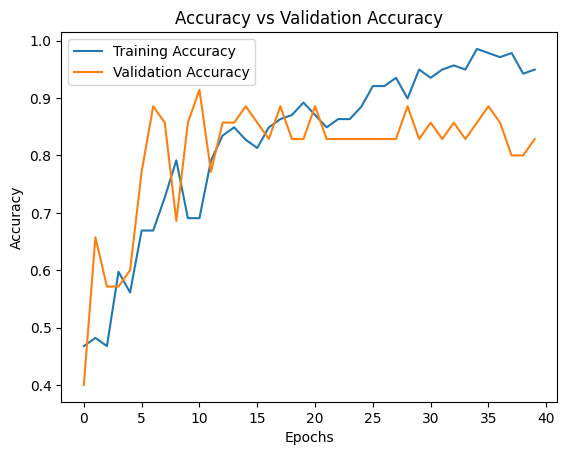

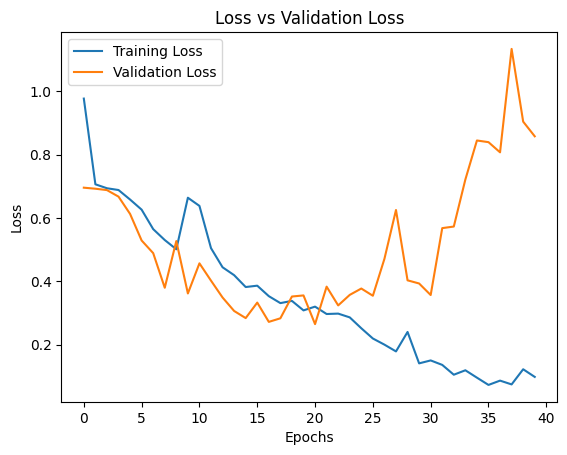

In [ ]:
# Plot Accuracy and Validation Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy vs Validation Accuracy')
plt.show()

# Plot Loss and Validation Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss vs Validation Loss')
plt.show()


In [ ]:
model.save("anemia_model.h5")


In [ ]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 41.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 62.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 kB 4.5 MB/s eta 0:00:00


In [ ]:
!pip install streamlit pyngrok


In [ ]:
%%writefile app.py
import streamlit as st
from PIL import Image
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array

# Load the saved model
model = load_model("/content/anemia_model.h5")

st.title("Eye-Anemia Detection")
upload_image = st.file_uploader(label='Upload an image for Eye-Anemia detection', type=['png', 'jpg', 'jpeg'])

def anemia(upload_image):
    if upload_image is not None:
        img = Image.open(upload_image).resize((224, 224))
        img_array = img_to_array(img) / 255.0
        img_array = np.expand_dims(img_array, axis=0)
        prediction = model.predict(img_array)
        threshold = 0.5
        prediction_classes = 1 if prediction[0][0] > threshold else 0
        return prediction_classes, img

if upload_image is not None:
    predict, img = anemia(upload_image)
    st.image(img, width=400)
    if predict == 0:
        st.markdown("<h1 style='text-align: left; color: green;'>No Anemia Detected</h1>", unsafe_allow_html=True)
    elif predict == 1:
        st.markdown("<h1 style='text-align: left; color: red;'>Anemia Detected</h1>", unsafe_allow_html=True)


Writing app.py


In [ ]:
from pyngrok import ngrok

# Set your ngrok authtoken
ngrok.set_auth_token("2o7um2GYE1isz6wXBJF0FRWtTmD_324BV9vdtJvAtuXA1kNmK")


In [ ]:
from pyngrok import ngrok
import subprocess

# Run the Streamlit app
port = 8501
public_url = ngrok.connect(port)
print("Streamlit app URL:", public_url)

# Start the Streamlit app
subprocess.Popen(["streamlit", "run", "/content/app.py", "--server.port", str(port)])


Streamlit app URL: NgrokTunnel: "https://13ae-35-231-151-21.ngrok-free.app" -> "http://localhost:8501"


<Popen: returncode: None args: ['streamlit', 'run', '/content/app.py', '--se...>

In [ ]:
import streamlit as st
from PIL import Image
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array

# Load the saved model
model = load_model("/content/anemia_model.h5")

st.title("Eye-Anemia Detection")
upload_image = st.file_uploader(label='Upload an image for Eye-Anemia detection', type=['png', 'jpg', 'jpeg'])

def anemia(upload_image):
    if upload_image is not None:
        # Preprocess the uploaded image
        img = Image.open(upload_image).resize((224, 224))
        img_array = img_to_array(img) / 255.0
        img_array = np.expand_dims(img_array, axis=0)

        # Make prediction
        prediction = model.predict(img_array)
        threshold = 0.5
        prediction_classes = 1 if prediction[0][0] > threshold else 0

        return prediction_classes, img

# Predict and display results
if upload_image is not None:
    predict, img = anemia(upload_image)
    st.image(img, width=400)
    if predict == 0:
        st.markdown("<h1 style='text-align: left; color: green;'>No Anemia Detected</h1>", unsafe_allow_html=True)
    elif predict == 1:
        st.markdown("<h1 style='text-align: left; color: red;'>Anemia Detected</h1>", unsafe_allow_html=True)


2024-10-29 20:11:28.834 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-29 20:11:29.127 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2024-10-29 20:11:29.130 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-29 20:11:29.133 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-29 20:11:29.135 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-29 20:11:29.137 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-29 20:11:29.140 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-29 20:11:29.147 Thread 'MainThread': mi